In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker # Used to format axis ticks (adding commas to numbers)

In [ ]:
df_crime_2009= pd.read_csv("Crime_Incidents_in_2009.csv")
df_crime_2010= pd.read_csv("Crime_Incidents_in_2010.csv")
df_crime_2011= pd.read_csv("Crime_Incidents_in_2011.csv")
df_crime_2012= pd.read_csv("Crime_Incidents_in_2012.csv")
df_crime_2013= pd.read_csv("Crime_Incidents_in_2013.csv")
df_crime_2014= pd.read_csv("Crime_Incidents_in_2014.csv")
df_crime_2015= pd.read_csv("Crime_Incidents_in_2015.csv")
df_crime_2016= pd.read_csv("Crime_Incidents_in_2016.csv")
df_crime_2017= pd.read_csv("Crime_Incidents_in_2017.csv")
df_crime_2018= pd.read_csv("Crime_Incidents_in_2018.csv")
df_crime_2019= pd.read_csv("Crime_Incidents_in_2019.csv")
df_crime_2020= pd.read_csv("Crime_Incidents_in_2020.csv")
df_crime_2021= pd.read_csv("Crime_Incidents_in_2021.csv")
df_crime_2022= pd.read_csv("Crime_Incidents_in_2022.csv")
df_crime_2023= pd.read_csv("Crime_Incidents_in_2023.csv")
df_crime_2024= pd.read_csv("Crime_Incidents_in_2024.csv")
df_crime_2025= pd.read_csv("Crime_Incidents_in_2025.csv")

In [ ]:
df_all_years = pd.concat([
    df_crime_2009, df_crime_2010, df_crime_2011, df_crime_2012,
    df_crime_2013, df_crime_2014, df_crime_2015, df_crime_2016,
    df_crime_2017, df_crime_2018, df_crime_2019, df_crime_2020,
    df_crime_2021, df_crime_2022, df_crime_2023, df_crime_2024,
    df_crime_2025
])

In [ ]:
df_all_years.shape

(546331, 25)

In [ ]:
print(df_all_years)

                   X              Y       CCN              REPORT_DAT  \
0         -76.942230      38.876704   9073036  2009/05/29 11:00:00+00   
1         -76.967311      38.918936   9073040  2009/05/29 13:55:00+00   
2         -77.000937      38.962009   9073045  2009/05/29 14:00:00+00   
3         -76.944599      38.898379   9073057  2009/05/29 14:30:00+00   
4         -76.934583      38.883420   9073059  2009/05/29 15:00:00+00   
...              ...            ...       ...                     ...   
18346  404692.006200  136093.595100  25038612  2025/03/18 01:15:07+00   
18347  397694.830000  146283.340000  25094092  2025/06/23 18:52:13+00   
18348  401822.200000  137058.440000  25094770  2025/06/24 20:17:28+00   
18349  399950.680000  139964.890000  25420821  2025/02/27 23:01:14+00   
18350  400088.828700  135298.943800  25116498  2025/08/01 16:37:53+00   

          SHIFT  METHOD                     OFFENSE  \
0      MIDNIGHT  OTHERS         MOTOR VEHICLE THEFT   
1           D

In [ ]:
df_all_years.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-76.942230,38.876704,9073036,2009/05/29 11:00:00+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,700 - 899 BLOCK OF RIDGE ROAD SE,405013.0,134320.0,...,009902 1,9902.0,Precinct 106,38.876696,-76.942228,NaN,2009/05/28 22:00:00+00,2009/05/29 10:30:00+00,407653186,NaN
1,-76.967311,38.918936,9073040,2009/05/29 13:55:00+00,DAY,OTHERS,THEFT/OTHER,2300 - 3099 BLOCK OF V STREET NE,402835.0,139007.0,...,011100 1,11100.0,Precinct 71,38.918928,-76.967309,NaN,2009/05/28 15:00:00+00,2009/05/29 17:15:00+00,407653187,NaN
2,-77.000937,38.962009,9073045,2009/05/29 14:00:00+00,DAY,OTHERS,THEFT/OTHER,300 - 599 BLOCK OF ONEIDA STREET NE,399919.0,143788.0,...,009505 1,9505.0,Precinct 65,38.962001,-77.000935,NaN,2009/05/29 00:45:00+00,2009/05/29 12:00:00+00,407653188,NaN
3,-76.944599,38.898379,9073057,2009/05/29 14:30:00+00,DAY,OTHERS,THEFT/OTHER,4000 - 4199 BLOCK OF GRANT STREET NE,404806.0,136726.0,...,007803 1,7803.0,Precinct 99,38.898372,-76.944597,NaN,2009/05/18 11:00:00+00,2009/05/18 11:15:00+00,407653189,NaN
4,-76.934583,38.883420,9073059,2009/05/29 15:00:00+00,DAY,OTHERS,ROBBERY,4650 - 4799 BLOCK OF BENNING ROAD SE,405676.0,135066.0,...,009907 2,9907.0,Precinct 103,38.883413,-76.934581,NaN,2009/05/29 14:00:00+00,2009/05/29 14:00:00+00,407653190,NaN


In [ ]:
# 1 visual comparing years with crimes using bar graph and using count

In [ ]:
# Extract YEAR from REPORT_DAT
df_all_years['YEAR'] = pd.to_datetime(df_all_years['REPORT_DAT']).dt.year

# Group by YEAR and OFFENSE, count incidents
counts = df_all_years.groupby(["YEAR", "OFFENSE"])["OFFENSE"].count()
counts.name = "Num_Incidents"  # Give a name to the counted series

# Reset index to convert to DataFrame
counts = counts.reset_index()

counts.head()

,YEAR,OFFENSE,Num_Incidents
0,2009,ARSON,52
1,2009,ASSAULT W/DANGEROUS WEAPON,2441
2,2009,BURGLARY,3497
3,2009,HOMICIDE,133
4,2009,MOTOR VEHICLE THEFT,4470


In [ ]:
# Pivot to have years as rows, offenses as columns
counts = counts.pivot_table(index="YEAR", columns="OFFENSE", values="Num_Incidents")
counts = counts.fillna(0)
counts.head()

OFFENSE,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
YEAR,,,,,,,,,
2009,52.0,2441.0,3497.0,133.0,4470.0,3750.0,112.0,4155.0,12727.0
2010,47.0,2345.0,4060.0,127.0,3780.0,3708.0,158.0,8178.0,9289.0
2011,44.0,2257.0,3863.0,107.0,3287.0,3940.0,176.0,9407.0,10134.0
2012,34.0,2364.0,3616.0,89.0,2832.0,4197.0,273.0,9743.0,12122.0
2013,35.0,2394.0,3358.0,104.0,2666.0,3981.0,299.0,10160.0,12877.0


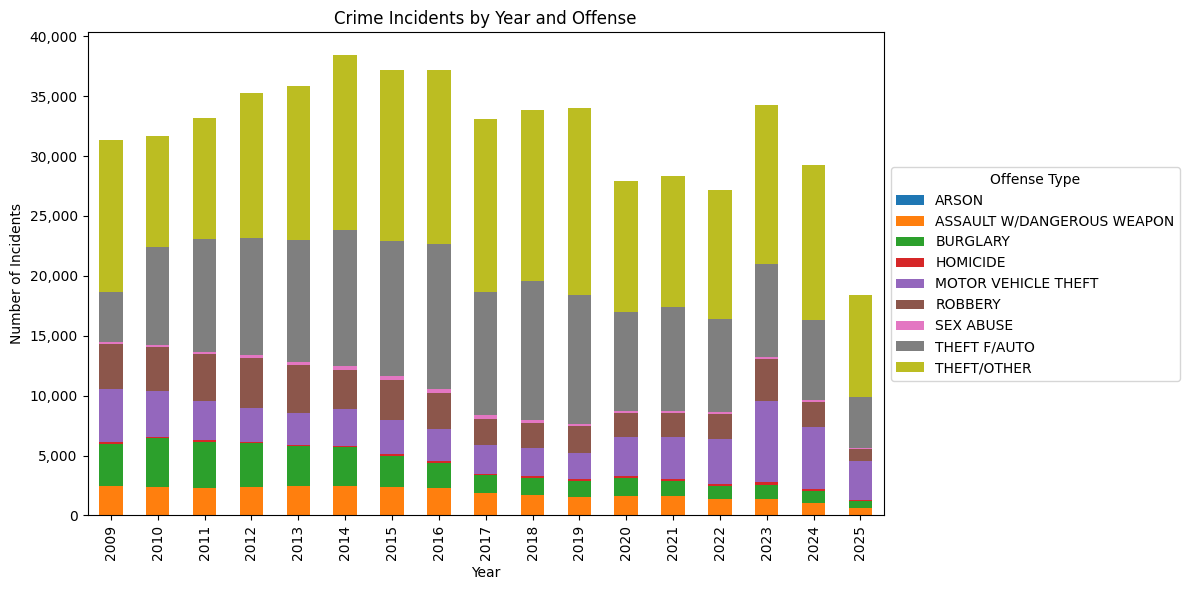

In [ ]:
#Plot stacked bar chart

fig, ax = plt.subplots(figsize=(12,6))
counts.plot(kind='bar', stacked=True, ax=ax)

# Add commas to y-axis tick labels
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Offense Type")
plt.ylabel("Number of Incidents")
plt.xlabel("Year")
plt.title("Crime Incidents by Year and Offense")
plt.tight_layout()
plt.show()

Obervation and Key Insights:

The Stacked bar graph displays the total number of crime incidents per year from 2009 to 2025, segmented by offense types. The y-axis respresents number of incidents, while each color segment within a bar corresponds to a specific offense types.

From the visualization, we can clearly see that crime rose steadily from 2009-2014, peaked till 2016. From 2017-2019, the the crime levels remained relatively stable but lower then peak years. A sharp decline occured during 2020-2022, likely influenced by covid pandemic related restrictions. However, gradual rebound can be seen in number of incidents in 2023, followed by a decline in 2024. The graph also displays data drom 2025, which shows the lowest number of incidents since 2009. This is because the year 2025 has not yet finished, so the data do not represent the full year.

Regarding the types of crime committed in DC area, Theft/Other was the most common offense that made the largest share of incidents each year, followed by Theft/Auto.

In [ ]:
# 2 visual boxplot to check shifts against number of incidents per year

In [ ]:
#Making sure YEAR column exists
df_all_years['YEAR'] = pd.to_datetime(df_all_years['REPORT_DAT']).dt.year

In [ ]:
#Standardize SHIFT names: remove leading/trailing spaces and capitalize
df_all_years['SHIFT'] = df_all_years['SHIFT'].str.strip().str.capitalize()

In [ ]:
# Count crimes per SHIFT per YEAR and rename the column
shift_counts = df_all_years.groupby(['SHIFT', 'YEAR'])['OFFENSE'].count().reset_index()
shift_counts.rename(columns={'OFFENSE': 'Num_Incidents'}, inplace=True)

In [ ]:
#Automatically get unique SHIFT categories from the data
shift_order = sorted(shift_counts['SHIFT'].unique())

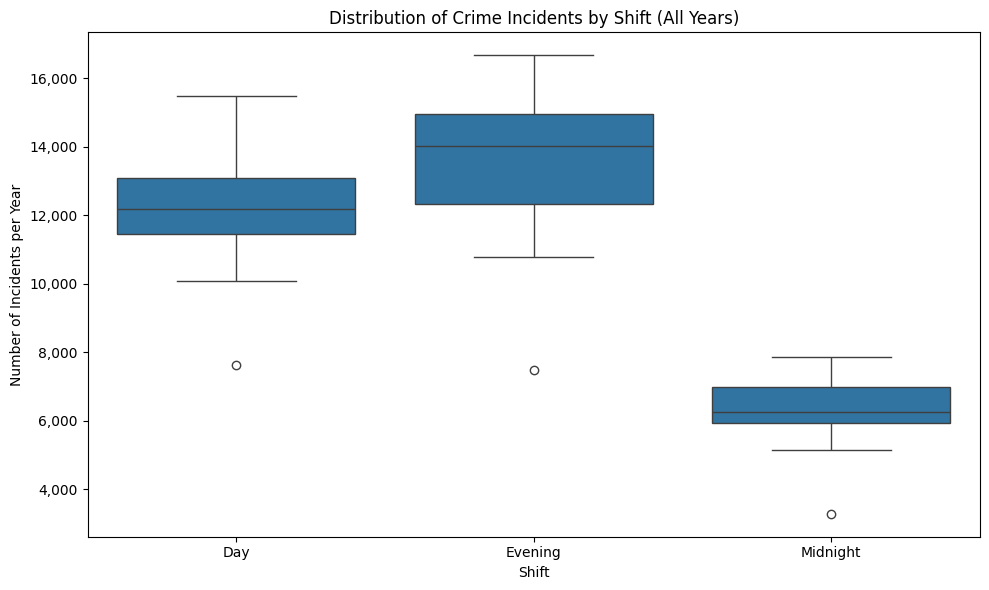

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(
    x='SHIFT',
    y='Num_Incidents',
    data=shift_counts,
    order=shift_order
)

# Adding commas to y-axis numbers (Googled it)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title("Distribution of Crime Incidents by Shift (All Years)")
plt.xlabel("Shift")
plt.ylabel("Number of Incidents per Year")
plt.tight_layout()
plt.show()

Observation and Key Insights:

The boxplot shows how crime incidents per year are distributed across different shifts over all 17 years. From the visualization, we can clearly see that the Evening shift has the highest median number of incidents per year and a wider interquartile range , indicating more variabilty in crime volume. This means that number of crimes changes alot from year to year. So some years have high crime counts in Evening shift and in some years, DC has low crime counts in evening shift. Furthermore, criminal activity peaks during the evening hours, which could be likely due to public activity, nightlife and reduced visibility.

In contrast, the Midnight shift has the lowest median and a tighter interquartile range, implying fewer offenses, likely to very less to none public activity at that time.

The plot also shows the outliers for each shift, which are low suggesting for some years, DC witnessed low number of incidents.